In [173]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [174]:
import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint



# Reflect Tables into SQLAlchemy ORM

In [175]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sqlalchemy import func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import Date

In [176]:
database_path = "../Resources/hawaii.sqlite"

# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connect = engine.connect()

inspect = inspect(engine)

In [177]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
inspect.get_table_names()

# reflect the tables
columns_measure = inspect.get_columns("measurement")
for column in columns_measure:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [178]:
columns_station = inspect.get_columns("station")
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [179]:
# View all of the classes found by automap
Base.classes.keys()

['measurement', 'station']

In [180]:
# Map measurements class
Measure = Base.classes.measurement
Measure


sqlalchemy.ext.automap.measurement

In [181]:
# Map station class
Station = Base.classes.station
Station


sqlalchemy.ext.automap.station

In [182]:
# Create session link from python to DB
session = Session(bind=engine)
session

In [183]:
# Looking at the data
engine.execute("SELECT * FROM station LIMIT 10").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [184]:
# Running SQL query to see data
measure = pd.read_sql("SELECT * FROM measurement", connect)
measure

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [185]:
# Running SQL query to see data
station = pd.read_sql("SELECT * FROM station", connect)
station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [186]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", prev_yr)


Query Date:  2016-08-23


In [188]:
# Perform a query to retrieve the date and precipitation scores
select = [Measure.date, Measure.prcp]
rain_data = session.query(*select).filter(Measure.date >= prev_yr)\
    .order_by(Measure.date).all()
print(rain_data)

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [162]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip = pd.DataFrame(rain_data, columns=['date', 'prcp'])
precip.sort_values(['date']).dropna()
precip=precip.rename(columns={'date':'Date', 'prcp':'Precipitation'})
precip

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [163]:
# Sort dataframe by date
precip.sort_index()


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


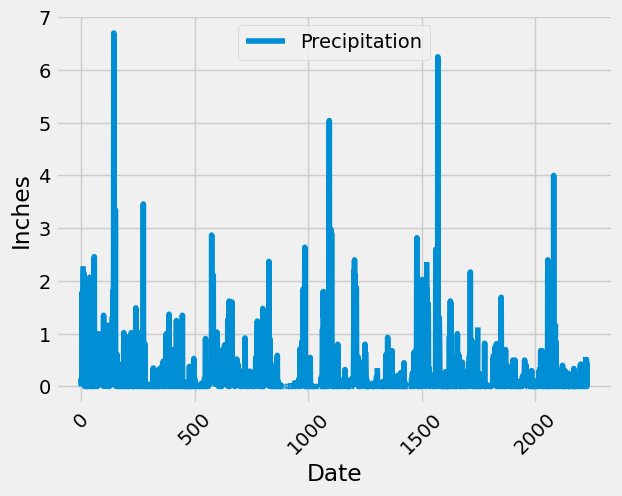

In [164]:
# Use Pandas Plotting with Matplotlib to plot the data
precip.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation = 45)
plt.savefig('Images/precip_chart.png')
plt.show()

In [165]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [189]:
# Design a query to calculate the total number stations in the dataset
station_ct = session.query(func.count(Station.station)).all()
station_ct
print(f'There are {station_ct} stations in this dataset.')

'There are [(9,)] stations in this dataset.'


In [191]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_ct = session.query(Measure.station, func.count(Measure.date)).\
    group_by(Measure.station).order_by(func.count(Measure.date).desc()).all()
station_ct

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [192]:
# Station with highest number of observations
best_station = station_ct[0][0]
best_station
print(f'The station with the highest number of observations is {best_station}.')

The station with the highest number of observations is USC00519281.


In [193]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
min_temp
print(f'The minimum temp is {min_temp}')



'The minimum temp is [(54.0,)]'


In [48]:
max_temp = session.query(func.max(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
max_temp
print(f'The max temp is {max_temp}')


The max temp is [(85.0,)]


In [135]:
# Average temperature
avg_temp = session.query(func.avg(Measure.tobs)).filter(Measure.station == 'USC00519281').all()
avg_temp
print(f'The average temp is {avg_temp}')

The average temp is [(71.66378066378067,)]


In [194]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
select =[Measure.station, Measure.date, Measure.tobs]
yr_temps = session.query(*select).filter(Measure.station == 'USC00519281').\
            filter(Measure.date > '2016-08-22').all()
yr_temps

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

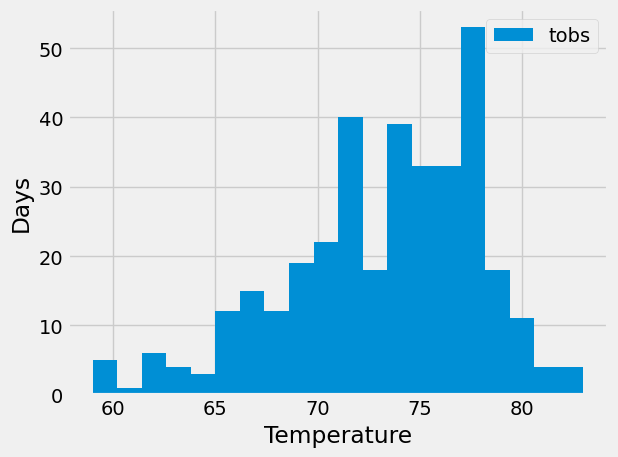

In [197]:
# Plot data in histogram for previous year dates and temperature for most active station 

temp_table = pd.DataFrame(yr_temps)
temp_table.plot.hist(column="tobs", bins=20)
plt.xlabel("Temperature")
plt.ylabel("Days")
plt.tight_layout()
plt.savefig('Images/temp_chart.png')
plt.show()


# Close session

In [198]:
# Close Session
session.close()